In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# simulation input parameters

J = 3  # segments
W = 5  # weather types
M = 9  # horizon - july to march
R = 1_000_000  # scenarios

In [3]:
# failure probability calculations

# equation 2
def calculate_qj(pmij, Njm):
    return 1 - np.prod([(1 - pmij[:, m])**Njm[j, m] for j in range(J) for m in range(M)], axis=0)

# equation 3
def calculate_rhoj(pmij, Njm, gammajm):
    term1 = np.prod([(1 - pmij[:, m])**Njm[j, m] for j in range(J) for m in range(M)], axis=0)
    term2 = np.prod([(1 - pmij[:, m])**Njm[j, m] for j in range(J) for m in range(M)], axis=0) * (1 - gammajm)
    return 1 - np.prod(term1 + term2, axis=0)

In [4]:
# simulation 1 million times

qj_results, rhoj_results = [], []

for _ in range(R):
    Njm = np.random.randint(20, 30, size=(J, M))  # number of weather events at month m in segment j
    pmij = np.random.uniform(1e-5, 1e-4, size=(J, M))  # failure probability of unit i of the segment j at month m if an event occurs
    gammajm = np.random.uniform(0, 1, size=J)  # the probability that a bad outcome occurs if unit j fails at month m
    
    qj = calculate_qj(pmij, Njm) # failure probability for segment j
    rhoj = calculate_rhoj(pmij, Njm, gammajm) # the probability that unit j fails and a bad outcome occurs
    
    qj_results.append(qj)
    rhoj_results.append(rhoj)

# convert to np array for plotting
qj_results = np.array(qj_results).flatten()
rhoj_results = np.array(rhoj_results).flatten()

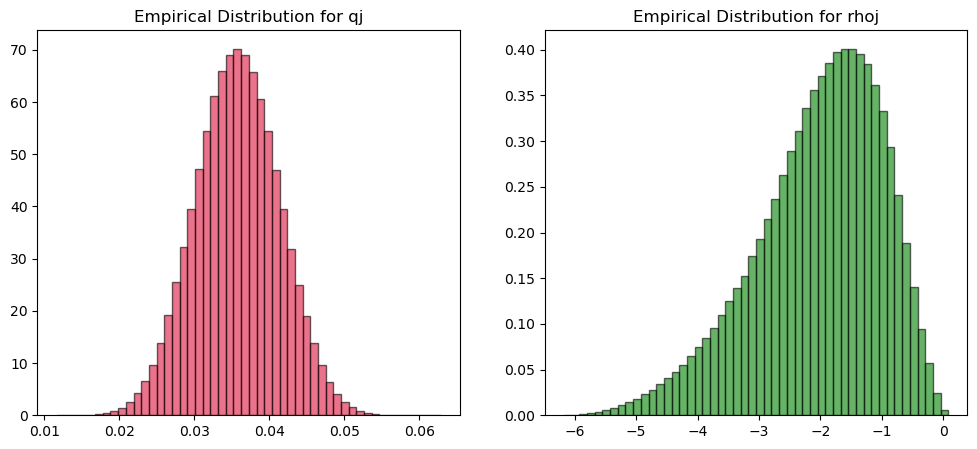

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(qj_results, bins=50, density=True, alpha=0.6, color='crimson', edgecolor='black')
plt.title('Empirical Distribution for qj')

plt.subplot(1, 2, 2)
plt.hist(rhoj_results, bins=50, density=True, alpha=0.6, color='green', edgecolor='black')
plt.title('Empirical Distribution for rhoj')

plt.show()